IBM cloud deployment
Team ID - PNT2022TMID39460

Importing the required libraries

In [1]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 438 kB 59.3 MB/s 
     |████████████████████████████████| 5.9 MB 40.2 MB/s 
     |████████████████████████████████| 1.7 MB 67.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

Load data

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

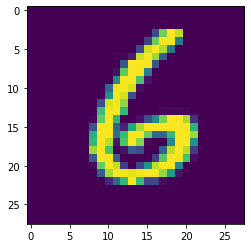

In [6]:
plt.imshow(x_train[6000])     #ploting the index=image

In [7]:
np.argmax(y_train[6000])

0

Reshaping Dataset

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

Applying One Hot Encoding

In [9]:
number_of_classes = 10  #storing the no of classes in a variable

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN Layers

In [11]:
#create model
model=Sequential ()

In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [17]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 219s 116ms/step - loss: 0.2122 - accuracy: 0.9534 - val_loss: 0.1076 - val_accuracy: 0.9671
Epoch 2/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.0743 - val_accuracy: 0.9784
Epoch 3/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0976 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.1075 - val_accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.0968 - val_accuracy: 0.9755


Observing the metrics

In [18]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09680865705013275, 0.9754999876022339]


Test The Model

In [19]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 114ms/step
[[1.8901574e-13 8.3081150e-15 4.8220490e-09 1.3100928e-06 1.3238487e-03
  6.5761361e-07 2.4383222e-13 6.1358332e-05 2.7666918e-05 9.9858522e-01]]


In [ ]:
plt.imshow(x_test[6000])

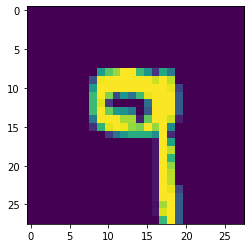

In [21]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [22]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

Save The model

In [23]:
# Save the model
model.save('/content/mnistCNN.h5')

In [ ]:
cd models

/home/wsuser/work/models

In [25]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [26]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.0 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 132 kB 51.7 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 9.8 MB 32.0 MB/s 
     |████████████████████████████████| 140 kB 46.9 MB/s 
     |████████████████████████████████| 956 kB 40.4 MB/s 
     |████████████████████████████████| 135 kB 51.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73930 sha256=b1b8d4c8faf652880bab0b7a69f4ed856482f296944d2f4c94a8572ec0223b19
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=fda6699033c

Cloud deploy

In [ ]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://jp-tok.ml.cloud.ibm.com",
    "apikey":"BHyalu2c7JN6n9cnvAVULvSKRYFVLMQ_m51toZ9Yk0nS"
}
client = APIClient(credentials)
client


In [ ]:
client.spaces.get_details()

In [ ]:
{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:jp-tok:a/53f9f6400d0d44889534e8abcd2dfe39:0f4376b6-c944-4b27-b23e-48b54d8f4bbd::',
      'guid': '0f4376b6-c944-4b27-b23e-48b54d8f4bbd',
      'name': 'Watson Machine Learning-sp',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digitrecognition',
    'scope': {'bss_account_id': '53f9f6400d0d44889534e8abcd2dfe39'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '63888f6f-d1ef-475c-a8d8-a2e4957bb673',
      'bucket_region': 'jp-tok-standard',
      'credentials': {'admin': {'access_key_id': '834b3358ebb945fb9ebbb4020cd2bf0e',
        'api_key': '2JONUuuPfYzZzPGzTp1J7dwwjNTpkOsyxdW5gx_vml3m',
        'secret_access_key': '1ed5b29fdd6c65b48ca72963b6177133ce51a7b23acdcaa5',
        'service_id': 'ServiceId-a2495f73-f36b-4fa1-9991-976f110c1a4f'},
       'editor': {'access_key_id': 'b56d445c54794369b2a4e0115e166605',
        'api_key': 'wcwCBLp8z4xpgnsEDeUCOZquAovrWhXu2wcF9Kz5Vhpe',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/53f9f6400d0d44889534e8abcd2dfe39:d8fa8aee-cd61-4757-9543-a61f55971074::',
        'secret_access_key': '84b0b128f52e57c025e6517604a06212b8d19f0b349eeea3',
        'service_id': 'ServiceId-4e1f87ab-27bc-4654-b6ea-667a8640c7e0'},
       'viewer': {'access_key_id': '558109e942fb4b1eb020c881f04d8588',
        'api_key': 'zWS-VZ_d9GfkDt1XnCmWoOA6liYXNnGtrPwJt2fI0UI5',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/53f9f6400d0d44889534e8abcd2dfe39:d8fa8aee-cd61-4757-9543-a61f55971074::',
        'secret_access_key': '3e2d27ab9d4041707cfa721daa638d1ad57f42ab8df94c09',
        'service_id': 'ServiceId-93177c88-86e2-470d-b5bf-3aed99d093a8'}},
      'endpoint_url': 'https://s3.jp-tok.cloud-object-storage.appdomain.cloud',
      'guid': 'd8fa8aee-cd61-4757-9543-a61f55971074',
      'resource_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/53f9f6400d0d44889534e8abcd2dfe39:d8fa8aee-cd61-4757-9543-a61f55971074::'},
     'type': 'bmcos_object_storage'}},
   'metadata': {'created_at': '2022-10-31T10:33:07.575Z',
    'creator_id': 'IBMid-667000CZ2Y',
    'id': 'aa24227a-9f01-493f-90e6-1b6132057fc6',
    'updated_at': '2022-10-31T10:33:25.148Z',
    'url': '/v2/spaces/aa24227a-9f01-493f-90e6-1b6132057fc6'}}]}


In [29]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client,'digitrecognition')
print("Space UID = " + space_uid)

Space UID = aa24227a-9f01-493f-90e6-1b6132057fc6

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list(limit=100)

In [ ]:
-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9               12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6          154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                     1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6           1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
kernel-spark3.3-r3.6             1c9e5454-f216-59dd-a20e-474a5cdf5988  base
pytorch-onnx_rt22.1-py3.9-edt    1d362186-7ad5-5b59-8b6c-9d0880bde37f  base
tensorflow_2.1-py3.6             1eb25b84-d6ed-5dde-b6a5-3fbdf1665666  base
spark-mllib_3.2                  20047f72-0a98-58c7-9ff5-a77b012eb8f5  base
tensorflow_2.4-py3.8-horovod     217c16f6-178f-56bf-824a-b19f20564c49  base
runtime-22.1-py3.9-cuda          26215f05-08c3-5a41-a1b0-da66306ce658  base
do_py3.8                         295addb5-9ef9-547e-9bf4-92ae3563e720  base
autoai-ts_3.8-py3.8              2aa0c932-798f-5ae9-abd6-15e0c2402fb5  base
tensorflow_1.15-py3.6            2b73a275-7cbf-420b-a912-eae7f436e0bc  base
kernel-spark3.3-py3.9            2b7961e2-e3b1-5a8c-a491-482c8368839a  base
pytorch_1.2-py3.6                2c8ef57d-2687-4b7d-acce-01f94976dac1  base
spark-mllib_2.3                  2e51f700-bca0-4b0d-88dc-5c6791338875  base
pytorch-onnx_1.1-py3.6-edt       32983cea-3f32-4400-8965-dde874a8d67e  base
spark-mllib_3.0-py37             36507ebe-8770-55ba-ab2a-eafe787600e9  base
spark-mllib_2.4                  390d21f8-e58b-4fac-9c55-d7ceda621326  base
xgboost_0.82-py3.6               39e31acd-5f30-41dc-ae44-60233c80306e  base
pytorch-onnx_1.2-py3.6-edt       40589d0e-7019-4e28-8daa-fb03b6f4fe12  base
default_r36py38                  41c247d3-45f8-5a71-b065-8580229facf0  base
autoai-ts_rt22.1-py3.9           4269d26e-07ba-5d40-8f66-2d495b0c71f7  base
autoai-obm_3.0                   42b92e18-d9ab-567f-988a-4240ba1ed5f7  base
pmml-3.0_4.3                     493bcb95-16f1-5bc5-bee8-81b8af80e9c7  base
spark-mllib_2.4-r_3.6            49403dff-92e9-4c87-a3d7-a42d0021c095  base
xgboost_0.90-py3.6               4ff8d6c2-1343-4c18-85e1-689c965304d3  base
pytorch-onnx_1.1-py3.6           50f95b2a-bc16-43bb-bc94-b0bed208c60b  base
autoai-ts_3.9-py3.8              52c57136-80fa-572e-8728-a5e7cbb42cde  base
spark-mllib_2.4-scala_2.11       55a70f99-7320-4be5-9fb9-9edb5a443af5  base
spark-mllib_3.0                  5c1b0ca2-4977-5c2e-9439-ffd44ea8ffe9  base
autoai-obm_2.0                   5c2e37fa-80b8-5e77-840f-d912469614ee  base
spss-modeler_18.1                5c3cad7e-507f-4b2a-a9a3-ab53a21dee8b  base
cuda-py3.8                       5d3232bf-c86b-5df4-a2cd-7bb870a1cd4e  base
autoai-kb_3.1-py3.7              632d4b22-10aa-5180-88f0-f52dfb6444d7  base
pytorch-onnx_1.7-py3.8           634d3cdc-b562-5bf9-a2d4-ea90a478456b  base
spark-mllib_2.3-r_3.6            6586b9e3-ccd6-4f92-900f-0f8cb2bd6f0c  base
tensorflow_2.4-py3.7             65e171d7-72d1-55d9-8ebb-f813d620c9bb  base
spss-modeler_18.2                687eddc9-028a-4117-b9dd-e57b36f1efa5  base
pytorch-onnx_1.2-py3.6           692a6a4d-2c4d-45ff-a1ed-b167ee55469a  base
spark-mllib_2.3-scala_2.11       7963efe5-bbec-417e-92cf-0574e21b4e8d  base
spark-mllib_2.4-py37             7abc992b-b685-532b-a122-a396a3cdbaab  base
caffe_1.0-py3.6                  7bb3dbe2-da6e-4145-918d-b6d84aa93b6b  base
pytorch-onnx_1.7-py3.7           812c6631-42b7-5613-982b-02098e6c909c  base
cuda-py3.6                       82c79ece-4d12-40e6-8787-a7b9e0f62770  base
tensorflow_1.15-py3.6-horovod    8964680e-d5e4-5bb8-919b-8342c6c0dfd8  base
hybrid_0.1                       8c1a58c6-62b5-4dc4-987a-df751c2756b6  base
pytorch-onnx_1.3-py3.7           8d5d8a87-a912-54cf-81ec-3914adaa988d  base
caffe-ibm_1.0-py3.6              8d863266-7927-4d1e-97d7-56a7f4c0a19b  base
spss-modeler_17.1                902d0051-84bd-4af6-ab6b-8f6aa6fdeabb  base
do_12.10                         9100fd72-8159-4eb9-8a0b-a87e12eefa36  base
do_py3.7                         9447fa8b-2051-4d24-9eef-5acb0e3c59f8  base
spark-mllib_3.0-r_3.6            94bb6052-c837-589d-83f1-f4142f219e32  base
cuda-py3.7-opence                94e9652b-7f2d-59d5-ba5a-23a414ea488f  base
nlp-py3.8                        96e60351-99d4-5a1c-9cc0-473ac1b5a864  base
cuda-py3.7                       9a44990c-1aa1-4c7d-baf8-c4099011741c  base
hybrid_0.2                       9b3f9040-9cee-4ead-8d7a-780600f542f7  base
spark-mllib_3.0-py38             9f7a8fc1-4d3c-5e65-ab90-41fa8de2d418  base
autoai-kb_3.3-py3.7              a545cca3-02df-5c61-9e88-998b09dc79af  base
spark-mllib_3.0-py39             a6082a27-5acc-5163-b02c-6b96916eb5e0  base
runtime-22.1-py3.9-do            a7e7dbf1-1d03-5544-994d-e5ec845ce99a  base
default_py3.8                    ab9e1b80-f2ce-592c-a7d2-4f2344f77194  base
tensorflow_rt22.1-py3.9          acd9c798-6974-5d2f-a657-ce06e986df4d  base
kernel-spark3.2-py3.9            ad7033ee-794e-58cf-812e-a95f4b64b207  base
autoai-obm_2.0 with Spark 3.0    af10f35f-69fa-5d66-9bf5-acb58434263a  base
default_py3.7_opence             c2057dd4-f42c-5f77-a02f-72bdbd3282c9  base
tensorflow_2.1-py3.7             c4032338-2a40-500a-beef-b01ab2667e27  base
do_py3.7_opence                  cc8f8976-b74a-551a-bb66-6377f8d865b4  base
spark-mllib_3.3                  d11f2434-4fc7-58b7-8a62-755da64fdaf8  base
autoai-kb_3.0-py3.6              d139f196-e04b-5d8b-9140-9a10ca1fa91a  base
spark-mllib_3.0-py36             d82546d5-dd78-5fbb-9131-2ec309bc56ed  base
autoai-kb_3.4-py3.8              da9b39c3-758c-5a4f-9cfd-457dd4d8c395  base
kernel-spark3.2-r3.6             db2fe4d6-d641-5d05-9972-73c654c60e0a  base
autoai-kb_rt22.1-py3.9           db6afe93-665f-5910-b117-d879897404d9  base
tensorflow_rt22.1-py3.9-horovod  dda170cc-ca67-5da7-9b7a-cf84c6987fae  base
autoai-ts_1.0-py3.7              deef04f0-0c42-5147-9711-89f9904299db  base
tensorflow_2.1-py3.7-horovod     e384fce5-fdd1-53f8-bc71-11326c9c635f  base
default_py3.7                    e4429883-c883-42b6-87a8-f419d64088cd  base
do_22.1                          e51999ba-6452-5f1f-8287-17228b88b652  base
autoai-obm_3.2                   eae86aab-da30-5229-a6a6-1d0d4e368983  base
do_20.1                          f686cdd9-7904-5f9d-a732-01b0d6b10dc5  base
scikit-learn_0.19-py3.6          f963fa9d-4bb7-5652-9c5d-8d9289ef6ad9  base
tensorflow_2.4-py3.8             fe185c44-9a99-5425-986b-59bd1d2eda46  base
-------------------------------  ------------------------------------  ----

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

In [ ]:
{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-01T10:15:40.847Z',
  'id': '97d463b1-45ee-47f7-b8af-aed338794ce1',
  'modified_at': '2022-11-01T10:15:44.197Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-667000CZ2Y',
  'resource_key': '84636ddb-9fa8-47e4-8fa4-3c36731e2fe6',
  'space_id': 'aa24227a-9f01-493f-90e6-1b6132057fc6'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

In [ ]:
'97d463b1-45ee-47f7-b8af-aed338794ce1'

In [ ]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'

In [ ]:
'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [ ]:
ls

DigitRecog_IBM_model.tar.gz                  mnistCNN.h5
handwritten-digit-recognition-model_new.tgz

TEST MODEL

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [ ]:
model = load_model("mnistCNN.h5")

In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [ ]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [ ]:
img

download (1).png

In [ ]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [ ]:
pred = model.predict(im2arr)
print(pred)

In [ ]:
[[1.0000000e+00 5.3912803e-17 3.9648812e-11 2.0051219e-16 5.1053910e-18
  2.9315760e-12 7.0849349e-13 2.0999634e-16 2.9204243e-09 7.4729778e-11]]

In [ ]:
print(np.argmax(pred, axis=1)) #printing our Labels

[0]